In [10]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Reclassify the target variable
iris_df['species'] = iris_df['species'].apply(lambda x: 0 if x == 'virginica' else 1)

# Display the first few rows of the dataset
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        1  
1        1  
2        1  
3        1  
4        1  


In [11]:
# Group the data by the target variable (species)
grouped_data = iris_df.groupby('species')

# Calculate descriptive statistics for each class
class_stats = grouped_data.describe()

# Print the descriptive statistics
print(class_stats)


        sepal length (cm)                                              \
                    count   mean       std  min    25%  50%  75%  max   
species                                                                 
0                    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   
1                   100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0   

        sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                   count   mean  ...               75%  max            count   
species                          ...                                           
0                   50.0  2.974  ...             5.875  6.9             50.0   
1                  100.0  3.099  ...             4.325  5.1            100.0   

                                                   
          mean       std  min  25%  50%  75%  max  
species                                            
0        2.026  0.274650  1.4  1.8  2.0  2.3  2.5  
1        0.786  0.565153 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


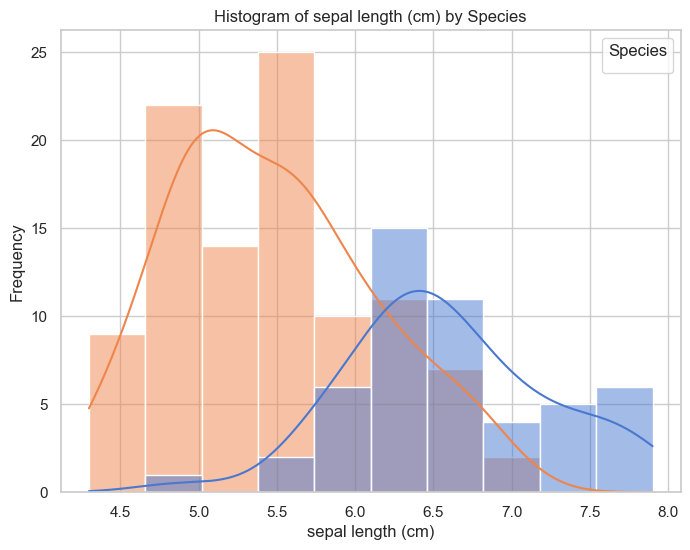

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


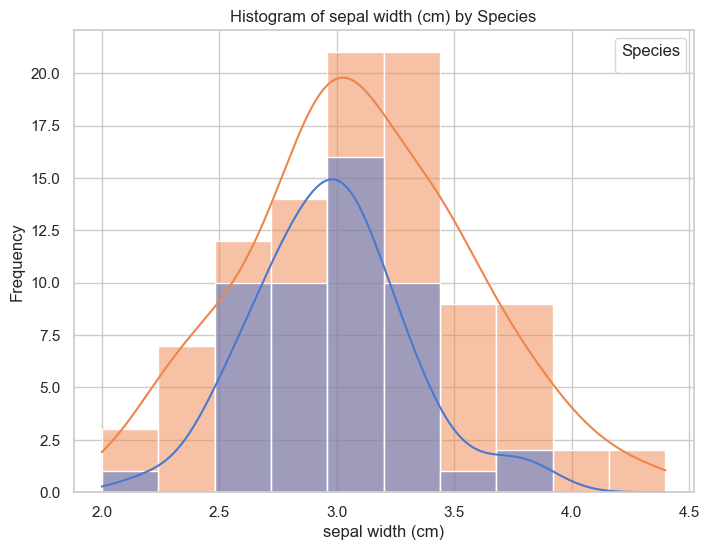

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


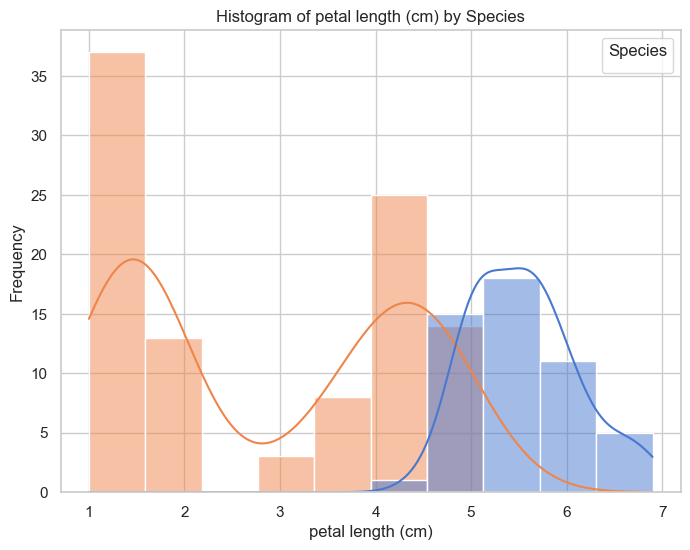

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


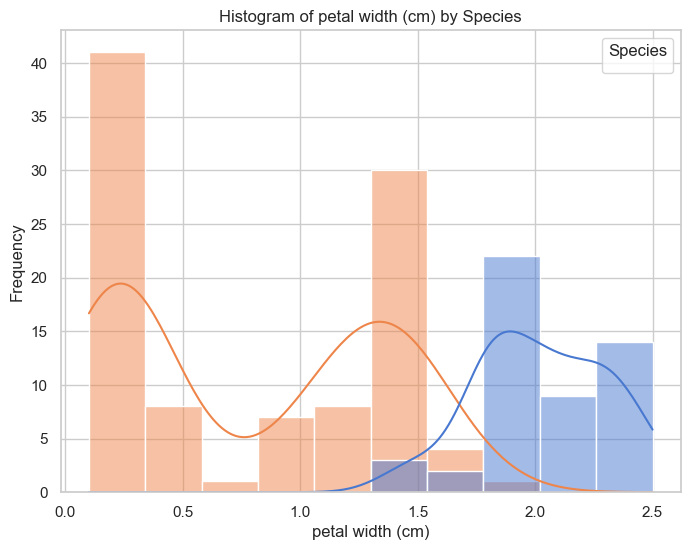

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for each feature, separated by class
for feature in iris_df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=iris_df, x=feature, hue="species", kde=True, palette="muted", bins=10)
    plt.title(f'Histogram of {feature} by Species')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Species')
    plt.show()


In [13]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = iris_df.iloc[:, :-1].corr()

# Display the correlation matrix
print("Correlation Matrix between the four features:")
print(correlation_matrix)


Correlation Matrix between the four features:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


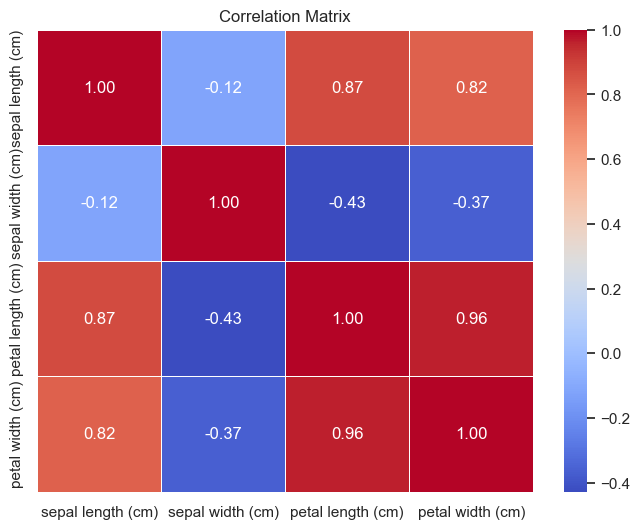

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = iris_df.iloc[:, :-1].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
# Split data into features (X) and target variable (y)
X = iris_df.drop(columns=['species'])
y = iris_df['species']


# Split data into train (80%), validation (10%), and test set (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (120, 4) (120,)
Validation set shape: (15, 4) (15,)
Test set shape: (15, 4) (15,)


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize dictionaries to store trained models and their accuracies
models = {}
accuracies = {}

# Train logistic regression models with 1, 2, 3, and 4 features
for i in range(1, 5):
    # Select i features
    selected_features = X_train.columns[:i]
    
    # Train logistic regression model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train[selected_features], y_train)
    
    # Store the trained model
    models[i] = model
    
    # Evaluate the model on the validation set
    accuracy = model.score(X_val[selected_features], y_val)
    accuracies[i] = accuracy

# Print the accuracies
for num_features, accuracy in accuracies.items():
    print(f"Accuracy with {num_features} feature(s): {accuracy:.2f}")


Accuracy with 1 feature(s): 0.93
Accuracy with 2 feature(s): 0.93
Accuracy with 3 feature(s): 1.00
Accuracy with 4 feature(s): 1.00


In [17]:
import pandas as pd

# Initialize an empty DataFrame to store the results for each model
results = pd.DataFrame()

# Iterate over each model
for num_features, model in models.items():
    # Select the corresponding features for the model
    selected_features = X_val.columns[:num_features]
    
    # Get the predicted probabilities for each class
    probabilities = model.predict_proba(X_val[selected_features])
    
    # Get the predicted class
    predicted_class = model.predict(X_val[selected_features])
    
    # Create a DataFrame to store the results for this model
    model_results = pd.DataFrame({
        'Instance': range(1, len(X_val) + 1),
        'Probability of predicting Virginica': probabilities[:, 1],
        'Predicted Class': predicted_class,
        'Ground Truth': y_val
    })
    
    # Add a column indicating the number of features used in this model
    model_results['Number of Features'] = num_features
    
    # Append the results for this model to the overall results DataFrame
    results = pd.concat([results, model_results], ignore_index=True)

# Print the results for each model
for num_features in models:
    print(f"Results for model with {num_features} feature(s):")
    print(results[results['Number of Features'] == num_features])


Results for model with 1 feature(s):
    Instance  Probability of predicting Virginica  Predicted Class  \
0          1                             0.935490                1   
1          2                             0.782088                1   
2          3                             0.062283                0   
3          4                             0.328067                0   
4          5                             0.663612                1   
5          6                             0.617736                1   
6          7                             0.328067                0   
7          8                             0.782088                1   
8          9                             0.955774                1   
9         10                             0.963480                1   
10        11                             0.246771                0   
11        12                             0.421169                0   
12        13                             0.922354    

In [18]:
import numpy as np
import plotly.graph_objs as go

def plot_decision_boundary(model, X, y, feature_names, title):
    # Define grid boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predictions on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    trace = go.Contour(x=xx[0], y=yy[:, 0], z=Z, 
                       colorscale=[[0, 'rgba(255,0,0,0.2)'], [1, 'rgba(0,255,0,0.2)']],
                       contours=dict(start=0, end=1, size=1))
    
    # Plot data points
    data = []
    for cls in np.unique(y):
        idx = np.where(y == cls)
        data.append(go.Scatter(x=X[idx, 0].flatten(), 
                               y=X[idx, 1].flatten(), 
                               mode='markers', 
                               marker=dict(color='rgb(0,0,255)' if cls == 0 else 'rgb(255,0,0)'), 
                               name=f'Class {cls}'))
    
    layout = go.Layout(title=title,
                       xaxis=dict(title=feature_names[0]),
                       yaxis=dict(title=feature_names[1]),
                       showlegend=False)
    
    fig = go.Figure(data=[trace] + data, layout=layout)
    fig.show()

# Plot decision boundaries for each model
plot_decision_boundary(model1, X_val[:, :2], y_val, feature_names[:2], 'Decision Boundary - Model 1')
plot_decision_boundary(model2, X_val[:, 1:3], y_val, feature_names[1:3], 'Decision Boundary - Model 2')
plot_decision_boundary(model3, X_val[:, :3], y_val, feature_names[:3], 'Decision Boundary - Model 3')


ModuleNotFoundError: No module named 'plotly'